In [1]:
from config import config as cfg
from dataset.data import clean_df, dataset_split
from dataset.generators import PredictGenerator
train_gp, train_df = clean_df(cfg.data_dir)
train_list, val_list = dataset_split(train_gp, test_size=0.01)
datagen = PredictGenerator(train_df, val_list, batch_size=2,
                           train_img_dir=cfg.train_dir)

using data from windows


Using TensorFlow backend.


length of dataframe is  (231723, 2)
image with ship:  81723
image without ship:  149999
trainset images with ship:  42130
trainset images without ship:  148499
testset images with ship:  426
testset images without ship:  1500


In [2]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [14]:
batch_image, batch_mask = datagen[7]

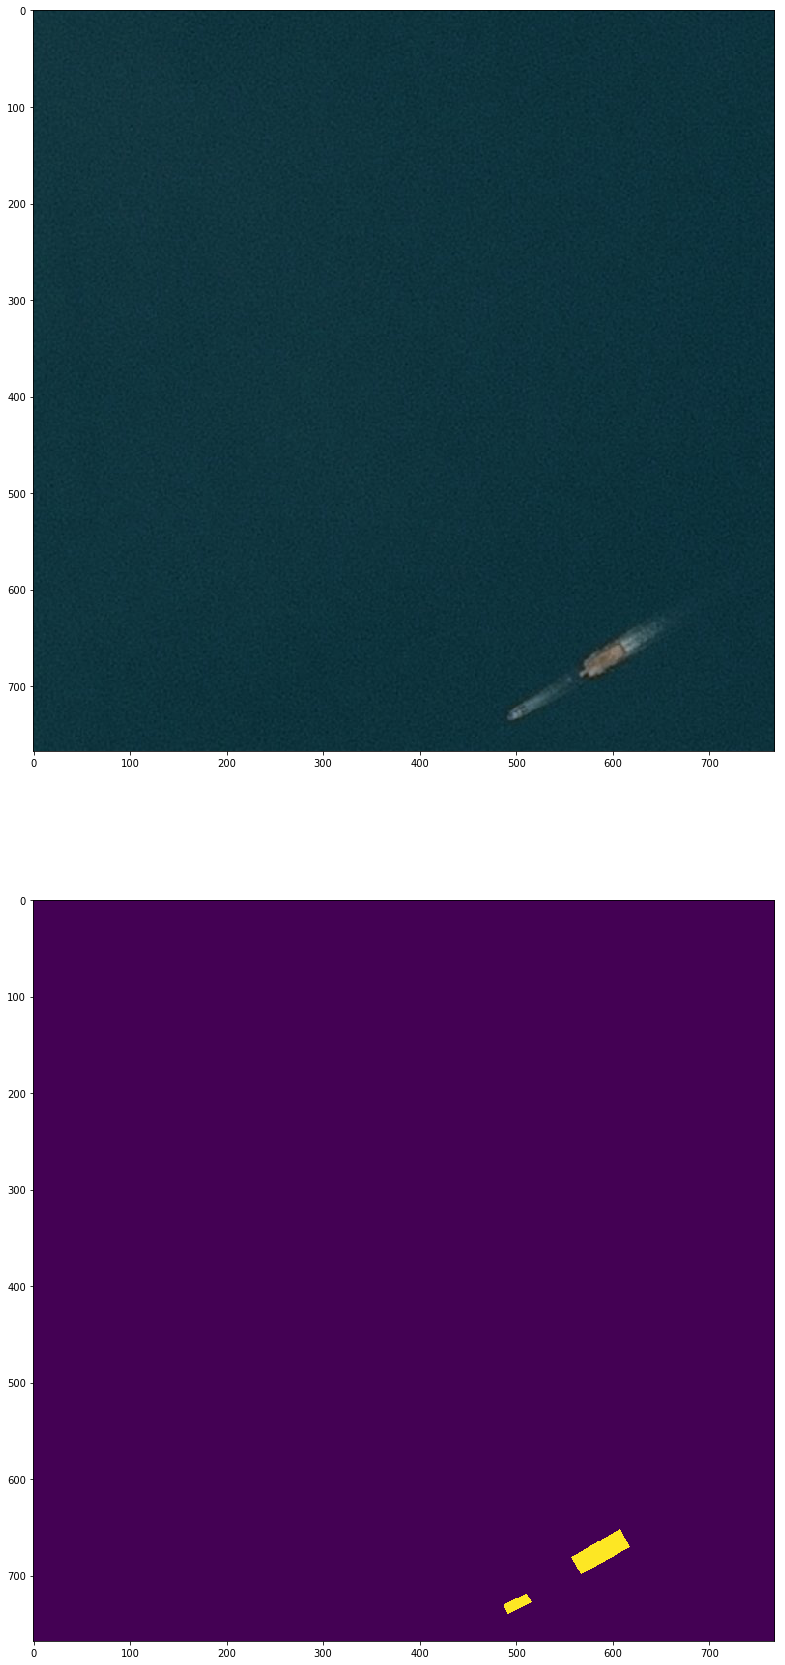

In [15]:
plt.figure(figsize=(60, 30))
plt.subplot(211)
plt.imshow(batch_image[0])
plt.subplot(212)
plt.imshow(np.squeeze(batch_mask[0]))

In [16]:
from dataset.data import create_mask
mask = np.squeeze(batch_mask[0])
mask.shape

(768, 768)

In [25]:
from skimage import measure
from skimage import morphology as morph

In [84]:
# mask[200:400, 400:600] = 1
mask = 1 - mask
labels = measure.label(mask, connectivity=1)
tmp = morph.dilation(labels > 0, morph.square(12))
tmp2 = morph.watershed(tmp, labels, mask=tmp, watershed_line=True) > 0
tmp = np.logical_xor(tmp, tmp2)
tmp = morph.dilation(tmp, morph.square(9))
# msk = (255 * tmp).astype('uint8')

C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


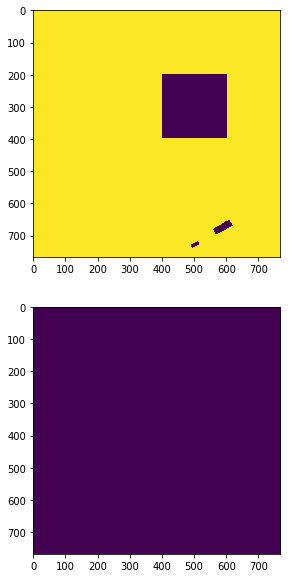

In [85]:
new_mask.shape
plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.imshow(labels)
plt.subplot(212)
plt.imshow(tmp)

In [82]:
np.unique(tmp)

array([False])

In [2]:
from config import config as cfg
from dataset.data import clean_df, dataset_split
from dataset.generators import BaseGenerator
train_gp, train_df = clean_df(cfg.data_dir)
train_list, val_list = dataset_split(train_gp, test_size=0.01)
datagen = BaseGenerator(train_df, train_list[0], train_list[1], 
                        batch_size=16, train_img_dir=cfg.train_dir,
                        pos_ratio=0.5, aug_parms=cfg.aug_parms, 
                        target_shape=cfg.input_shape[:2],
                        preprocessing_function=None)

using data from windows


Using TensorFlow backend.


length of dataframe is  (231723, 2)
image with ship:  81723
image without ship:  149999
trainset images with ship:  42130
trainset images without ship:  148499
testset images with ship:  426
testset images without ship:  1500


In [ ]:
from utils import makedir, get_number_of_steps
steps_per_epoch = get_number_of_steps(len(train_list[0]), int(16*cfg.pos_ratio))
steps_per_epoch

In [4]:
batch_image, batch_mask = datagen[0]

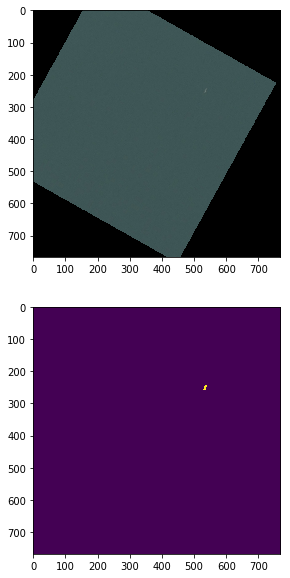

In [6]:
n = 1
plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.imshow(batch_image[n])
plt.subplot(212)
plt.imshow(np.squeeze(batch_mask[n]))

In [ ]:
batch_image.max()

In [7]:
batch_mask.max()

1.0

In [ ]:
cfg.input_shape[:2]

In [ ]:
name = train_list[0][5]

In [ ]:
mask_list = train_df['EncodedPixels'][train_df['ImageId'] == name].tolist()

In [ ]:
from skimage.io import imread
from skimage.transform import resize
import os
image = imread(os.path.join(cfg.train_dir, name))

In [ ]:
image = resize(image, [768, 768])
plt.imshow(image)

In [ ]:
image.max()

In [ ]:
resize?

In [ ]:
plt.imshow(np.squeeze(batch_mask[n][300:350, 450:550]))
batch_mask[n]

In [8]:
np.unique(batch_mask[n])

array([0., 1.], dtype=float32)

In [9]:
val_list['ImageId'].tolist()

['2a518f6fa.jpg',
 'a8908cd99.jpg',
 '445c95cb6.jpg',
 'f177443d3.jpg',
 '98db744cf.jpg',
 '0c94304f6.jpg',
 '620362fba.jpg',
 '55a4aa259.jpg',
 '8b2aaf013.jpg',
 'a473dac22.jpg',
 '01aaa7cb9.jpg',
 '026b15aeb.jpg',
 'fb4561082.jpg',
 '8d644fd3c.jpg',
 '218e63a96.jpg',
 '27e6735ce.jpg',
 'c55948775.jpg',
 '9a85ed1f2.jpg',
 '73059c0d6.jpg',
 '510a8c286.jpg',
 '2336096b2.jpg',
 '074d7b4a1.jpg',
 'cb6579d91.jpg',
 '72deb159a.jpg',
 '7b4b5eb12.jpg',
 '5b5888401.jpg',
 '2e653858b.jpg',
 '598085d83.jpg',
 'f426e8a3f.jpg',
 'db46a4662.jpg',
 'b1b94be12.jpg',
 '1706d206f.jpg',
 '699406c49.jpg',
 '4402f513e.jpg',
 '3fff6d98e.jpg',
 '802ee1a4b.jpg',
 '1ecd20053.jpg',
 'eb4e2a02e.jpg',
 'af6cf2f72.jpg',
 'ade3b9d4d.jpg',
 '1d0fb283b.jpg',
 '7fc8c46c0.jpg',
 'c083a6d45.jpg',
 'b1f2d00e2.jpg',
 'ee966586d.jpg',
 '15f2d7b6c.jpg',
 '1297b7af3.jpg',
 'd8715ad26.jpg',
 'b382829f4.jpg',
 '0fee1454a.jpg',
 '10b0fbcfe.jpg',
 'f0291a1d7.jpg',
 '069ceb1fc.jpg',
 'fac774789.jpg',
 '42bc368e7.jpg',
 'c22821a0

In [10]:
train_list

[['0d8cf4b10.jpg',
  'c1e03ac43.jpg',
  '7fbf59e70.jpg',
  '9664b3648.jpg',
  'd1e1a6a74.jpg',
  '6beedf524.jpg',
  '2965b98e8.jpg',
  '42e10d9a2.jpg',
  '8a2d6d043.jpg',
  'f5e740fc8.jpg',
  'fd9673b27.jpg',
  '6ecc48828.jpg',
  '744a76d05.jpg',
  'affd25253.jpg',
  'af04845b4.jpg',
  '385fd805c.jpg',
  'd2c90c6b6.jpg',
  '4c75eb90d.jpg',
  '0cd8c51dd.jpg',
  '109e11c08.jpg',
  '4148e6a00.jpg',
  'ffd20fd4f.jpg',
  '0aa2623c1.jpg',
  'd0bce0378.jpg',
  '54c1ebb68.jpg',
  'dd725b622.jpg',
  '5a9cfe329.jpg',
  '6fbcfae2c.jpg',
  '94444acb8.jpg',
  '9ceb8e973.jpg',
  '374be91dc.jpg',
  'baca192dd.jpg',
  '21ba649a5.jpg',
  '24c770cd8.jpg',
  'adedac40b.jpg',
  'de10e6def.jpg',
  'b902aa0a0.jpg',
  '306e34093.jpg',
  '60ffddc62.jpg',
  'cf214076f.jpg',
  'b68bcc5b2.jpg',
  'c9ab40474.jpg',
  '6dd6af694.jpg',
  '158bf31e1.jpg',
  '1030fae02.jpg',
  '9a5d9fdb7.jpg',
  '9652fa24a.jpg',
  'a6ae01701.jpg',
  'ff6af69bb.jpg',
  'abc54a33c.jpg',
  '9b214b66a.jpg',
  '890ea1a11.jpg',
  '1d913b774